In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [115]:
MAINPATH = os.getcwd()

In [120]:
sine_4 = pd.read_csv(MAINPATH+"/sine/4_sine_grid.csv", header=0)
sine_4["train_mae"]=sine_4["train_mae"].str.replace(',','.').astype(float)
sine_4["test_mae"]=sine_4["test_mae"].str.replace(',','.').astype(float)

In [121]:
sine_9 = pd.read_csv(MAINPATH+"/sine/9_sine_grid.csv", header=0)
sine_9.drop(sine_9[sine_9['input_type'] == 'mackey'].index, inplace = True)
sine_9["train_mae"]=sine_9["train_mae"].astype(float)
sine_9["test_mae"]=sine_9["test_mae"].astype(float)

In [123]:
mackey_9 = pd.read_csv(MAINPATH+"/sine/9_sine_grid.csv", header=0)
mackey_9.drop(mackey_9[mackey_9['input_type'] == 'sine'].index, inplace = True)
mackey_9["train_mae"]=mackey_9["train_mae"].astype(float)
mackey_9["test_mae"]=mackey_9["test_mae"].astype(float)

## Plot mean peformance of each variable

In [89]:
def calculate_mean_and_std_by_variable(data, fixed_variable):
    
    mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
    std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)
    
    #std = np.nan_to_num(std)
    
    plus_std_train = mean[["train_mae"]].to_numpy().squeeze()+std[["train_mae"]].to_numpy().squeeze()
    minus_std_train = mean[["train_mae"]].to_numpy().squeeze()-std[["train_mae"]].to_numpy().squeeze()

    plus_std_test= mean[["test_mae"]].to_numpy().squeeze()+std[["test_mae"]].to_numpy().squeeze()
    minus_std_test = mean[["test_mae"]].to_numpy().squeeze()-std[["test_mae"]].to_numpy().squeeze()
    
    index = mean.index.to_numpy()
    
    return mean, std, plus_std_train, minus_std_train, plus_std_test, minus_std_test, index

In [93]:
std

,train_mae,test_mae
atom_distance,,
4,0.017140,0.018554
8,0.020600,0.015695
15,0.028663,0.033007
35,0.026713,0.551877


In [91]:
variables = ['inp_duration', 'sample_len', 'atom_distance']

/tmp/ipykernel_8646/1799266477.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
/tmp/ipykernel_8646/1799266477.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)


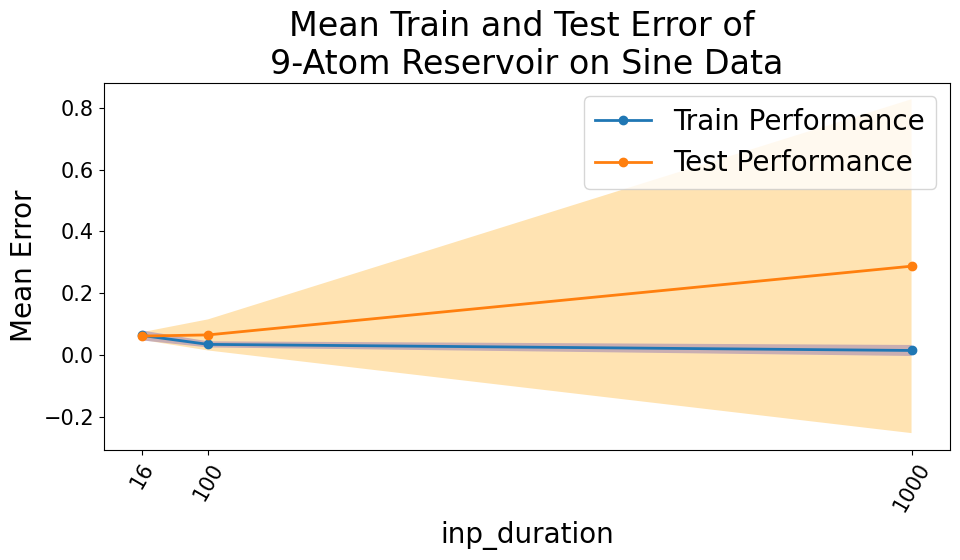

/tmp/ipykernel_8646/1799266477.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
/tmp/ipykernel_8646/1799266477.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)


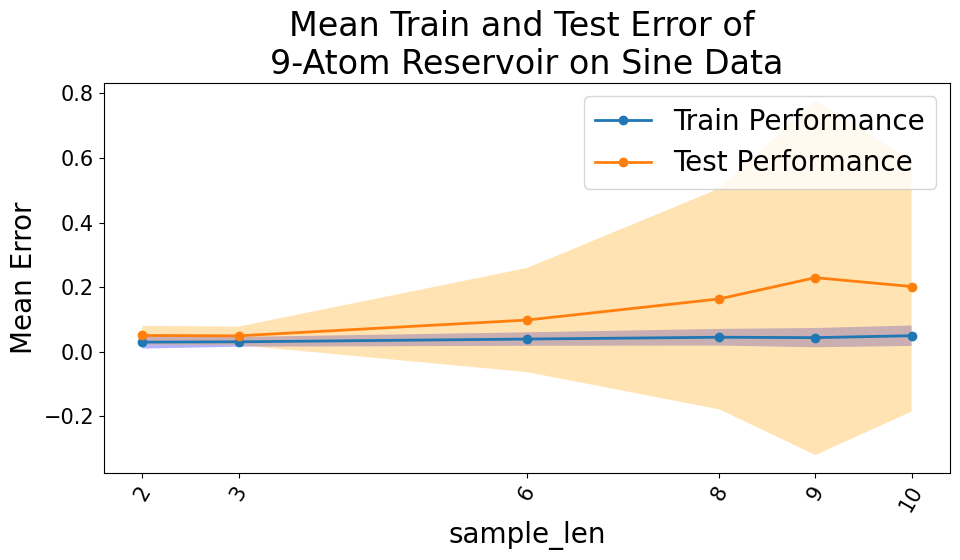

/tmp/ipykernel_8646/1799266477.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = data.groupby([fixed_variable])['train_mae', 'test_mae'].mean()
/tmp/ipykernel_8646/1799266477.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std = data.groupby([fixed_variable])['train_mae', 'test_mae'].std().fillna(0)


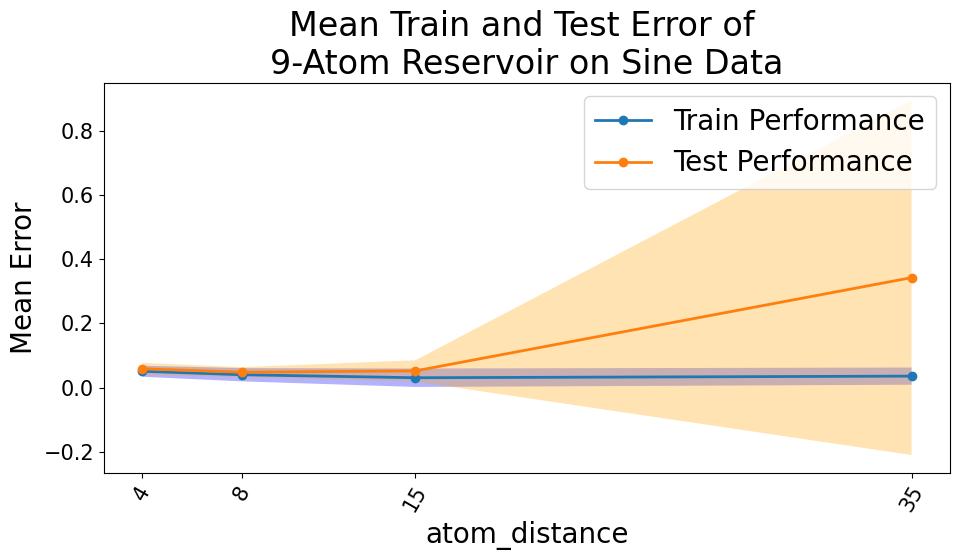

In [92]:
for var in variables:
    mean, std, plus_std_train, minus_std_train, plus_std_test, minus_std_test, index = calculate_mean_and_std_by_variable(sine_9, var)
    
    plt.figure(figsize=(10,6), tight_layout=True)#plotting

    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.xticks(rotation=60)

    plt.plot(mean[["train_mae"]], 'o-',  linewidth=2)#customization
    plt.plot(mean[["test_mae"]], 'o-',  linewidth=2)

    plt.fill_between(index, plus_std_train, minus_std_train, facecolor='blue', alpha=0.3)
    plt.fill_between(index, plus_std_test, minus_std_test, facecolor='orange', alpha=0.3)

    plt.xticks(index)
    plt.xlabel(var)
    plt.ylabel('Mean Error')
    plt.title('Mean Train and Test Error of \n9-Atom Reservoir on Sine Data')
    plt.legend(labels=['Train Performance', 'Test Performance'])
    plt.savefig(MAINPATH+'/9_qubits_sine_'+var+'.png')
    plt.show()
    


## Find models that perform better than linreg

In [94]:
sine_9_better_test = sine_9[sine_9['test_mae'] < 0.01262]

In [95]:
sine_9_better_test

,input_type,train_len,test_len,inp_duration,N_samples,sample_len,reset_rate,nb_atoms,geometry,atom_distance,train_mae,test_mae
60,sine,250,30,1000,1024,6,0,9,grid_lattice_centred,15,1.488404e-14,0.010181
63,sine,250,30,1000,1024,8,0,9,grid_lattice_centred,15,3.509016e-15,0.006627
69,sine,250,30,1000,1024,10,0,9,grid_lattice_centred,15,7.807412e-15,0.012047


In [96]:
sine_9_better_train = sine_9[sine_9['train_mae'] < 0.015925]

In [97]:
sine_9_better_train

,input_type,train_len,test_len,inp_duration,N_samples,sample_len,reset_rate,nb_atoms,geometry,atom_distance,train_mae,test_mae
49,sine,280,20,1000,1024,2,0,9,grid_lattice_centred,8,1.063373e-02,0.026567
50,sine,280,20,1000,1024,2,0,9,grid_lattice_centred,15,2.108156e-04,0.113479
51,sine,280,20,1000,1024,2,0,9,grid_lattice_centred,35,8.203813e-05,0.099187
57,sine,250,30,1000,1024,3,0,9,grid_lattice_centred,15,2.215555e-05,0.025612
58,sine,250,30,1000,1024,3,0,9,grid_lattice_centred,35,2.704178e-03,0.120938
60,sine,250,30,1000,1024,6,0,9,grid_lattice_centred,15,1.488404e-14,0.010181
61,sine,250,30,1000,1024,6,0,9,grid_lattice_centred,35,1.701517e-03,0.582555
63,sine,250,30,1000,1024,8,0,9,grid_lattice_centred,15,3.509016e-15,0.006627
64,sine,250,30,1000,1024,8,0,9,grid_lattice_centred,35,1.178434e-02,1.192451
66,sine,250,30,1000,1024,9,0,9,grid_lattice_centred,15,4.658445e-15,0.014901


## Find 4 atom models that perform best

In [110]:
sine_4_sorted_test = sine_4.sort_values(by=['test_mae'])[:7]

In [111]:
sine_4_sorted_test

,input_type,train_len,test_len,inp_duration,N_samples,sample_len,reset_rate,nb_atoms,geometry,atom_distance,train_mae,test_mae
0,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,15,0.023554,0.024081
1,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,30,0.023003,0.024850
2,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,70,0.023066,0.024907
3,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,10,0.024735,0.026382
4,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,8,0.023283,0.026820
5,sine,250,50,1000,1024,3,0,4,grid_lattice_centred,70,0.031730,0.031279
6,sine,250,50,1000,1024,3,0,4,grid_lattice_centred,30,0.031809,0.031386


In [112]:
sine_4_sorted_train = sine_4.sort_values(by=['train_mae'])[:7]

In [113]:
sine_4_sorted_train

,input_type,train_len,test_len,inp_duration,N_samples,sample_len,reset_rate,nb_atoms,geometry,atom_distance,train_mae,test_mae
1,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,30,0.023003,0.024850
2,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,70,0.023066,0.024907
4,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,8,0.023283,0.026820
0,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,15,0.023554,0.024081
3,sine,250,50,1000,1024,2,0,4,grid_lattice_centred,10,0.024735,0.026382
7,sine,250,50,1000,1024,3,0,4,grid_lattice_centred,15,0.027594,0.032106
14,sine,250,50,100,1024,2,0,4,grid_lattice_centred,70,0.031063,0.037218
